<a href="https://colab.research.google.com/github/sinyoung0110/DeepLearning/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from io import IncrementalNewlineDecoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
import os
import PIL
import shutil

#기본 경로
base_dir='./OX_images/'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

#훈련용 O/X 이미지 경로
train_o_dir=os.path.join(train_dir,'O')
train_x_dir=os.path.join(train_dir,'X')
print(train_o_dir,train_x_dir)

# 검증용 O/X 이미지 경로
validation_o_dir=os.path.join(validation_dir,'O')
validation_x_dir=os.path.join(validation_dir,'X')
print(validation_o_dir,validation_x_dir)

# 테스트용 O/X 이미지 경로
test_o_dir=os.path.join(test_dir,'O')
test_x_dir=os.path.join(test_dir,'X')
print(test_o_dir,test_x_dir)

./OX_images/train/O ./OX_images/train/X
./OX_images/validation/O ./OX_images/validation/X
./OX_images/test/O ./OX_images/test/X


In [12]:
#훈련용 이미지 파일 이름 조회
train_o_fnames=os.listdir(train_o_dir)
train_x_fnames=os.listdir(train_x_dir)
print(train_o_fnames)
print(train_x_fnames)

['o3 (2).png', 'o4 (2).png', 'o4 (4).png', 'o8 (3).png', 'pod2.png', 'o10 (3).png', '1558_1 (3).png', '11 - 복사본.png', 'pod3.png', 'oo2.png', 'o9 (2).png', 'o3 (4)(1).png', 'O8(1).png', '17 (1).png', 'o4 (5).png', '1O.png', '10 - 복사본.png', 'o10.png', 'o_4.png', '4_석.png', 'o8 (4)(1).png', 'o6 (1).png', 'o7 (3).png', 'oo1.png', 'oo10.png', 'circle3.png', '5 (1).png', 'o1 (2).png', '1558_1 (8).png', 'circle2.png', '10.png', '원1.png', 'o_6.png', 'o3 (5).png', 'oooo_o (1).png', 'o6 (4)(1).png', 'o9 (4)(1).png', 'pod.png', 'o7.png', 'ooo3.png', '1558_1 (4).png', 'o2.png', 'o7 (4)(1).png', '1558_1 (2).png', 'o8 (1).png', 'o5 (6).png', 'o8 (2).png', 'o_10.png', 'circle5.png', '14.png', 'o10 (1).png', 'o5 (4)(1).png', 'O10(1).png', 'o1 (1).png', '1558_1 (1).png', 'o_3.png', 'o5.png', 'o4 (4)(1).png', 'circle9.png', 'o3 (1).png', '7 (1).png', 'o7 (1).png', 'o6.png', 'o2 (5).png', 'O4(1).png', 'O6(1).png', 'o6 (4).png', 'o7 (2).png', '9.png', 'o2 (6).png', '13.png', '10 (1).png', '4.png', 'circle

In [13]:
print('Total training o images :', len(os.listdir(train_o_dir)))
print('Total training x images :', len(os.listdir(train_x_dir)))

print('Total validation o images :', len(os.listdir(validation_o_dir)))
print('Total validation x images :', len(os.listdir(validation_x_dir)))

print('Total test o images :', len(os.listdir(test_o_dir)))
print('Total test x images :', len(os.listdir(test_x_dir)))

Total training o images : 170
Total training x images : 170
Total validation o images : 10
Total validation x images : 10
Total test o images : 10
Total test x images : 10


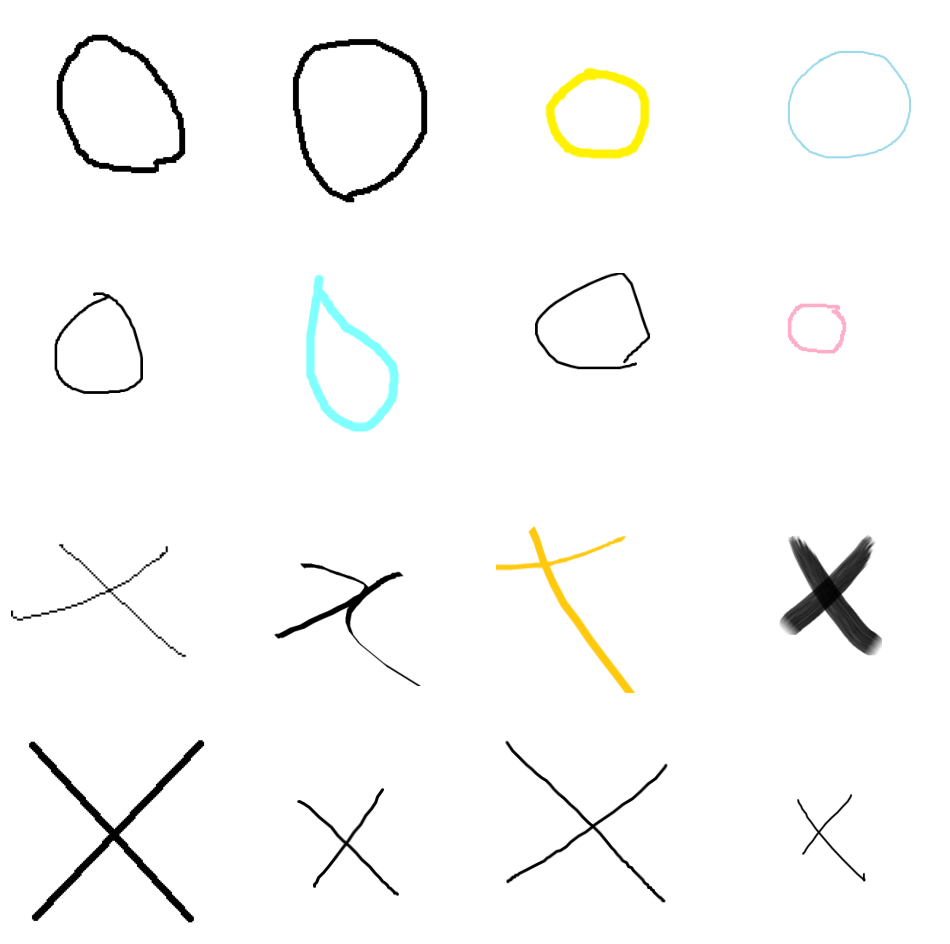

In [14]:
#이미지 확인
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows,ncols=4,4
pic_index= 0
fig=plt.gcf()
fig.set_size_inches(ncols*3,nrows*3)

pic_index+=8

next_o_pix=[os.path.join(train_o_dir,fname) for fname in train_o_fnames[pic_index-8:pic_index]]
next_x_pix=[os.path.join(train_x_dir,fname) for fname in train_x_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_o_pix+next_x_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('OFF')

  img=mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [17]:
# 이미지 데이터 전처리
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=25,
                                 width_shift_range=0.05,
                                 height_shift_range=0.05,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 fill_mode='nearest'
                                 )
validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [46]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  batch_size=64,
                                                  color_mode='grayscale',
                                                  class_mode='binary',
                                                  target_size=(200,200))
validation_generator=validation_datagen.flow_from_directory(validation_dir,
                                                            batch_size=8,
                                                            color_mode='grayscale',
                                                            class_mode='binary',
                                                            target_size=(200,200))
test_generator=test_datagen.flow_from_directory(test_dir,
                                                batch_size=8,
                                                color_mode='grayscale',
                                                class_mode='binary',
                                                target_size=(200,200))


Found 339 images belonging to 3 classes.
Found 20 images belonging to 3 classes.
Found 20 images belonging to 3 classes.


In [47]:
train_generator.class_indices

{'.ipynb_checkpoints': 0, 'O': 1, 'X': 2}

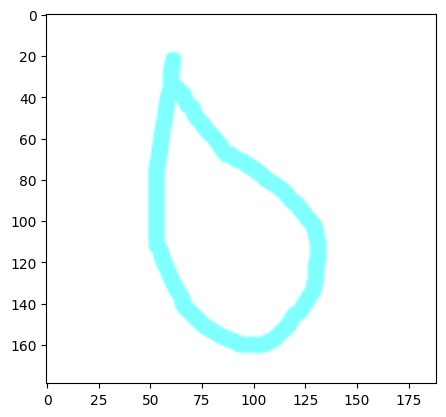

In [51]:
sample_img=mpimg.imread(next_o_pix[5])
plt.imshow(sample_img)
plt.show()

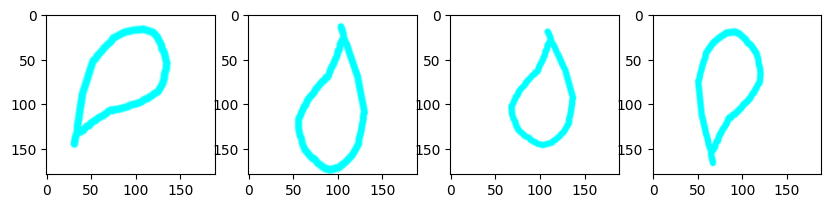

In [52]:
max_iter=4
cnt=1
sample_img2=sample_img[np.newaxis, ...]

plt.figure(figsize=(10,10))
for img in train_datagen.flow(sample_img2):
  plt.subplot(1,max_iter,cnt)
  plt.imshow(image.array_to_img(img[0]))
  if cnt== max_iter:
    break
  cnt+=1

In [54]:
import tensorflow as tf

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 23, 23, 128)      

In [55]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
#RMSprop (Root Mean Square Propagation) Alogrithm: 훈련 과정 중에 학습률을 적절하게 변화시킨다.

In [ ]:
history=model.fit_generator(train_generator,
                            validation_data=validation_generator,
                            steps_per_epoch=4,
                            epochs=100,
                            validation_steps=4,
                            verbose=2)

<ipython-input-57-9594c4128f5d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,


Epoch 1/100
4/4 - 20s - loss: -3.3743e+07 - accuracy: 0.4929 - 20s/epoch - 5s/step
Epoch 2/100
4/4 - 19s - loss: -4.6676e+07 - accuracy: 0.4929 - 19s/epoch - 5s/step
Epoch 3/100
4/4 - 20s - loss: -6.1180e+07 - accuracy: 0.5403 - 20s/epoch - 5s/step
Epoch 4/100
4/4 - 19s - loss: -8.5897e+07 - accuracy: 0.5166 - 19s/epoch - 5s/step
Epoch 5/100
4/4 - 20s - loss: -1.1855e+08 - accuracy: 0.4739 - 20s/epoch - 5s/step
Epoch 6/100
4/4 - 19s - loss: -1.5400e+08 - accuracy: 0.4976 - 19s/epoch - 5s/step
Epoch 7/100
4/4 - 20s - loss: -1.8820e+08 - accuracy: 0.4976 - 20s/epoch - 5s/step
Epoch 8/100
4/4 - 25s - loss: -2.5049e+08 - accuracy: 0.4766 - 25s/epoch - 6s/step
Epoch 9/100
4/4 - 19s - loss: -2.9418e+08 - accuracy: 0.4976 - 19s/epoch - 5s/step
Epoch 10/100
4/4 - 19s - loss: -3.5715e+08 - accuracy: 0.5071 - 19s/epoch - 5s/step
Epoch 11/100
4/4 - 21s - loss: -4.7141e+08 - accuracy: 0.4645 - 21s/epoch - 5s/step
Epoch 12/100
4/4 - 20s - loss: -5.7085e+08 - accuracy: 0.4597 - 20s/epoch - 5s/step
E

In [33]:
model.evaluate(train_generator)

22/22 [==============================] - 2s 100ms/step - loss: -11916105728.0000 - accuracy: 0.4985


[-11916105728.0, 0.49852508306503296]

In [34]:
model.evaluate(validation_generator)

5/5 [==============================] - 0s 41ms/step - loss: -11844036608.0000 - accuracy: 0.5000


[-11844036608.0, 0.5]

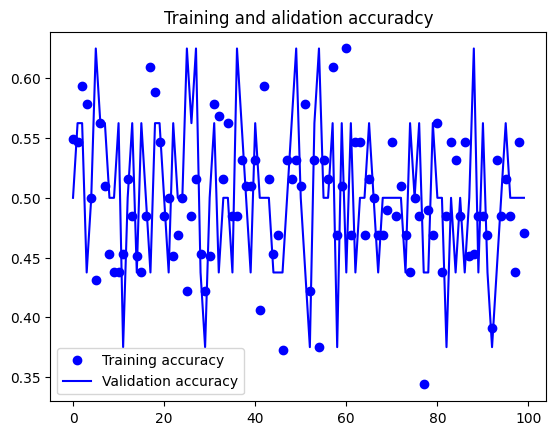

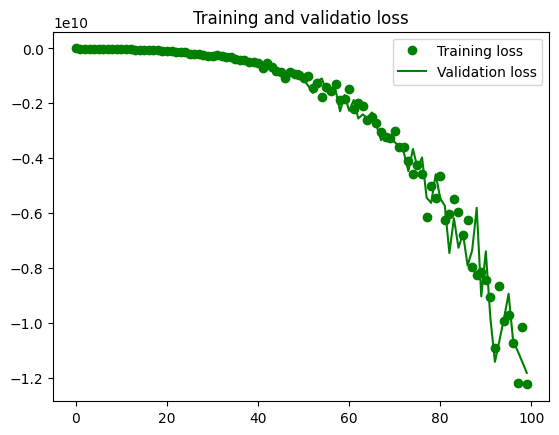

In [36]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and alidation accuradcy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'go',label='Training loss')
plt.plot(epochs,val_loss,'g',label='Validation loss')
plt.title('Training and validatio loss')
plt.legend()

plt.show()

In [37]:
import numpy as np
from keras.preprocessing import image

test_dir='./OX_images/test/'
test_o_dir=os.path.join(test_dir,'O/')
test_o_filenames=os.listdir(test_o_dir)
test_o_filenames

test_dir='./OX_images/test/'
test_x_dir=os.path.join(test_dir,'X/')
test_x_filenames=os.listdir(test_x_dir)
test_x_filenames

dic_ox_filenames={}
dic_ox_filenames['O']=test_o_filenames
dic_ox_filenames['X']=test_x_filenames

1/1 [==============================] - 0s 74ms/step
1 8 1
1/1 [==============================] - 0s 57ms/step
1 8 2
1/1 [==============================] - 0s 31ms/step
1 8 3
1/1 [==============================] - 0s 26ms/step
1 8 4
1/1 [==============================] - 0s 29ms/step
1 8 5
1/1 [==============================] - 0s 27ms/step
1 8 6
1/1 [==============================] - 0s 30ms/step
1 8 7
1/1 [==============================] - 0s 29ms/step
1 8 8
1/1 [==============================] - 0s 29ms/step
1 8 9
1/1 [==============================] - 0s 28ms/step
1 8 10


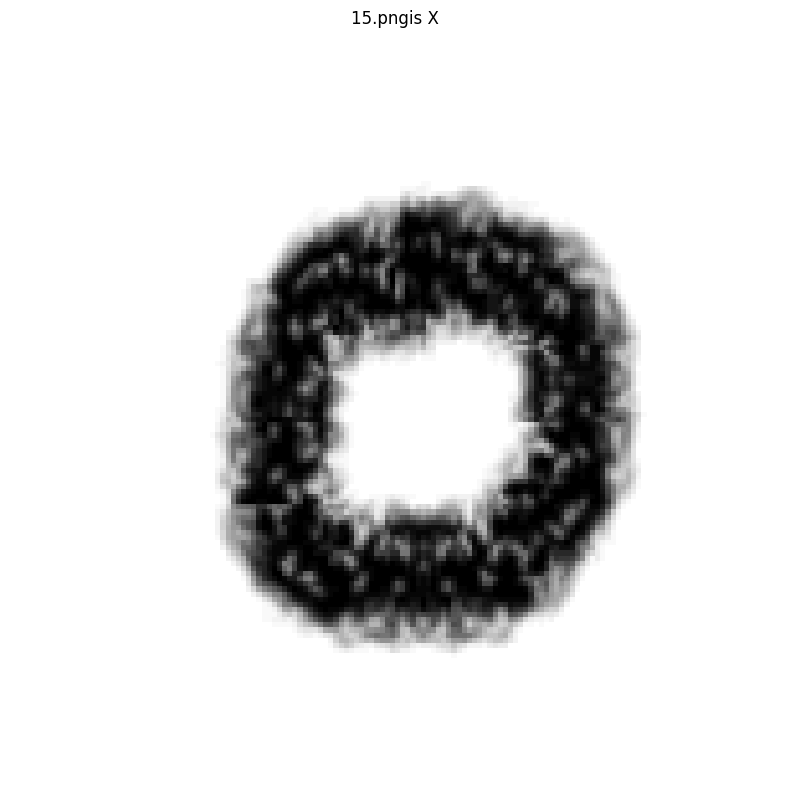

1/1 [==============================] - 0s 43ms/step
1 8 1
1/1 [==============================] - 0s 26ms/step
1 8 2
1/1 [==============================] - 0s 31ms/step
1 8 3
1/1 [==============================] - 0s 28ms/step
1 8 4
1/1 [==============================] - 0s 27ms/step
1 8 5
1/1 [==============================] - 0s 25ms/step
1 8 6
1/1 [==============================] - 0s 27ms/step
1 8 7
1/1 [==============================] - 0s 45ms/step
1 8 8
1/1 [==============================] - 0s 44ms/step
1 8 9
1/1 [==============================] - 0s 43ms/step
1 8 10


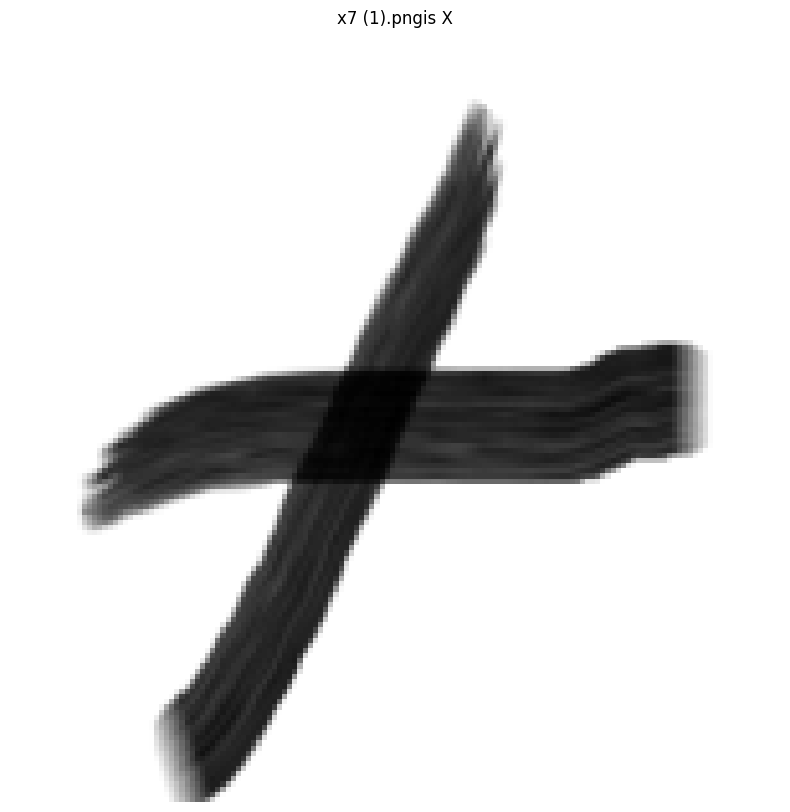

In [40]:
for ox,filenames in dic_ox_filenames.items():
  fig=plt.figure(figsize=(16,10))
  rows,cols=1,10
  for i, fn in enumerate(filenames):
    path=test_dir+ox+'/'+fn
    test_img=image.load_img(path,color_mode='grayscale', target_size=(200,200),interpolation='bilinear')
    x=image.img_to_array(test_img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])

    classes=model.predict(images,batch_size=10)
    print(rows,cols,i+1)
    if classes[0]==0:
      plt.title(fn+"is O")
      plt.axis('off')
      plt.imshow(test_img,cmap='gray')
    else:
      plt.title(fn+"is X")
      plt.axis('off')
      plt.imshow(test_img,cmap='gray')
  plt.show();

In [41]:
import os

folder_path='./OX_images/test/O/.ipynb_checkpoints'

if os.path.exists(folder_path):
  shutil.rmtree(folder_path)
  print('Folder dleted successfully')
else:
  print("folder not found")
folder_path='./OX_images/test/X/.ipynb_checkpoints'

if os.path.exists(folder_path):
  shutil.rmtree(folder_path)
  print("Folder deleted successfully")
else:
  print("Folder not found")


folder not found
Folder not found


In [42]:
model.evaluate(test_generator)

5/5 [==============================] - 1s 71ms/step - loss: -11639359488.0000 - accuracy: 0.5000


[-11639359488.0, 0.5]

In [43]:
model.save('ox_class_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
